
# Visualization of MLP weights on MNIST


Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix have the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance.


Automatically created module for IPython interactive environment
Iteration 1, loss = 1.13533436
Iteration 2, loss = 0.32163740
Iteration 3, loss = 0.23773363
Iteration 4, loss = 0.18763681
Iteration 5, loss = 0.15280040
Iteration 6, loss = 0.13091054
Iteration 7, loss = 0.11256205
Iteration 8, loss = 0.09906557
Iteration 9, loss = 0.08958712
Iteration 10, loss = 0.08087974


/home/empotrados/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.979050
Test set score: 0.967200


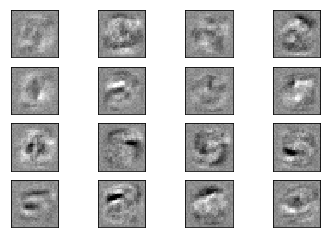

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(64,128), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=5, random_state=1,
                    learning_rate_init=.1, activation='logistic')

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
#print(mlp.coefs_.count())


with open('./coef.c', 'w') as f:
    f.write('const float WeightHidden1 [] = {')
    for item in mlp.coefs_[0].T:
        f.write("%s, \n" % item)
    f.write('};\n')
    f.write('const float WeightHidden2 [] = {')
    for item2 in mlp.coefs_[1].T:
        f.write("%s, " % item2)
    f.write('};\n')
    f.write('const float BiasesOUT [] = {')
    for item2 in mlp.coefs_[2].T:
        f.write("%s, " % item2)
    f.write('};')

with open('./bias.c', 'w') as f2:
    f2.write('const float BiasesHidden1 [] = {')
    for item2 in mlp.intercepts_[0].T:
        f2.write("%s, " % item2)
    f2.write('};\n')
    f2.write('const float BiasesHidden2 [] = {')
    for item2 in mlp.intercepts_[1].T:
        f2.write("%s, " % item2)
    f2.write('};\n')
    f2.write('const float BiasesOUR [] = {')
    for item2 in mlp.intercepts_[2].T:
        f2.write("%s, " % item2)
    f2.write('};\n')
        

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()